In [23]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
 
# import cv2/numpy

#cv2.UMath(file) number.32float(file)

import os
from PIL import Image
image_files = []
for dirname, _, filenames in os.walk('/kaggle/input/gopro-deblur/'):
    for filename in filenames:
        file = os.path.join(dirname, filename)
        image = Image.open(file)
        print(file)
        height = 220
        width = 220
        dim = (width, height)
        res = cv2.resize(np.float32(image), dim, interpolation=cv2.INTER_LINEAR)
        print(1)
        

# # Preprocessing
# res_img = []
# def processing():
#     # loading image
#     # Getting 3 images to work with 
  
#     #print('Original size',img[0].shape)
#     # --------------------------------
#     # setting dim of the resize
#     height = 220
#     width = 220
#     dim = (width, height)
#     for files in image_files:
#         print(files)
#         res = cv2.resize('/kaggle/input/gopro-deblur/gopro-deblur/sharp/images'+ filename, dim, interpolation=cv2.INTER_LINEAR)
#         print(1)
#         #res_img.append(res)
  
#     # Checking the size
#     #print("RESIZED", res_img[0].shape)
    
#     # Visualizing one of the images in the array
#     #original = res_img[1]
#    #display_one(original)
    
    
# processing()

/kaggle/input/gopro-deblur/gopro_deblur/sharp/images/000585.png


ValueError: could not convert string to float: '/kaggle/input/gopro-deblur/gopro_deblur/sharp/images/000585.png'

In [64]:
print(len(image_files))

2058


In [2]:


# Preprocessing
res_img = []
def processing():
    # loading image
    # Getting 3 images to work with 
  
    #print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    for files in image_files:
        print(files)
        res = cv2.resize('/kaggle/input/gopro-deblur/gopro-deblur/sharp/images'+ filename, dim, interpolation=cv2.INTER_LINEAR)
        print(1)
        #res_img.append(res)
  
    # Checking the size
    #print("RESIZED", res_img[0].shape)
    
    # Visualizing one of the images in the array
    #original = res_img[1]
   #display_one(original)
    
    
processing()












# Preprocessing
res_img = []
def processing(data):
    # loading image
    # Getting 3 images to work with 
  
    #print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    for files in data:
        res = cv2.resize(files, dim, interpolation=cv2.INTER_LINEAR)
        print(1)
        res_img.append(res)
  
    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)
    
    
processing(image_files)

NameError: name 'image_files' is not defined

In [8]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display


ValueError: too many values to unpack (expected 2)

In [24]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [25]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

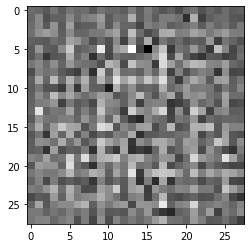

In [26]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [29]:
print(len(res_img))

0


In [27]:
discriminator = make_discriminator_model()
generated_image = res_img[0]
decision = discriminator(generated_image)
print (decision)

IndexError: list index out of range

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)